# TASK 1 - TITANIC SURVIVAL PREDICTION

### Libraries

### Problem statement :-
Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not.

##### Columns 
survived - Survived (0 = No; 1 = Yes) PassengerIds -id numbers)
name - Name
sex - Sex
age - Pclass - 1 , 2 , 3 different classes
sibsp - Number of Siblings/Spouses Aboardboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
# import libraries 

## Data manipulation
import pandas as pd

## Arrays 
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Scaling 
from sklearn.preprocessing import StandardScaler

## train and test split 
from sklearn.model_selection import train_test_split, cross_val_score

## machine learning models 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Data Exploration

In [2]:
# loading the titanic dataset
titanic_dataset = pd.read_csv(r"F:\Machine learning\Datasets\Titanic.csv") # To avoid this interpretation and treat backslashes as literal characters, i used prefix r before file path.
# printing 5 random rows from the dataset
titanic_dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
76,968,0,3,"Miles, Mr. Frank",male,NaN,0,0,359306,8.0500,NaN,S
240,1132,1,1,"Lindstrom, Mrs. Carl Johan (Sigrid Posse)",female,55.0,0,0,112377,27.7208,NaN,C
294,1186,0,3,"Wittevrongel, Mr. Camille",male,36.0,0,0,345771,9.5000,NaN,S
39,931,0,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S


In [3]:
# Exploring the dataset to understand its structure, features, and missing values.
## Structure
print(f"Shape of the dataset : {titanic_dataset.shape}")
print("--"*30)
print("\n")

# Datatypes
print(f"Dataset Datatypes")
print("--"*30)
print(titanic_dataset.dtypes)
print("--"*30)
print("\n")


# information of Dataset
print("Information of titanic_dataset")
print("--"*30)
print(titanic_dataset.info())
print("--"*30)
print("\n")

# Checking duplicated values 
print("Duplicated values")
print("--"*30)
print(titanic_dataset.duplicated().value_counts())
print("\n")

# Checking the missing values
print("--"*30)
print("Missing Values")
print("--"*30)
print(titanic_dataset.isna().sum())
print("\n")

Shape of the dataset : (418, 12)
------------------------------------------------------------


Dataset Datatypes
------------------------------------------------------------
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
------------------------------------------------------------


Information of titanic_dataset
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 n

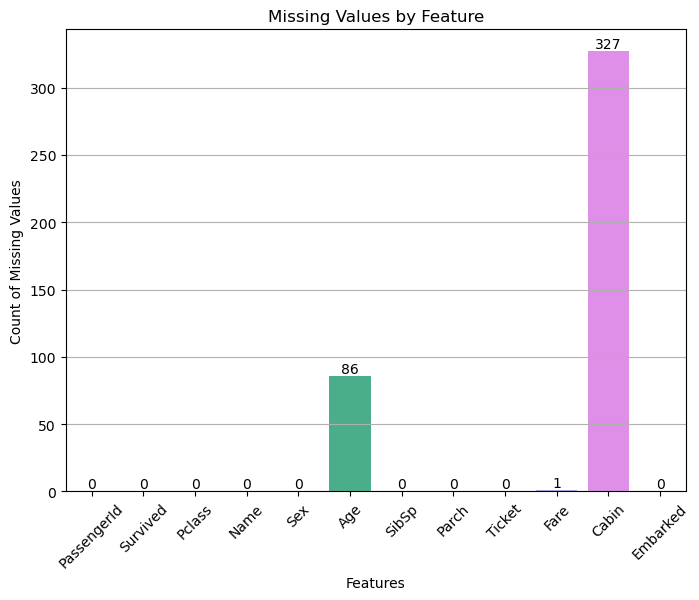

In [4]:
# Visualization of the missing values 
plt.figure(figsize=(8, 6))
# Storing missing values
missing_values_count = titanic_dataset.isna().sum()
plt.grid(True)
sns.barplot(x=missing_values_count.index, y=missing_values_count.values)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values by Feature')
# Add labels to the bars
for index, value in enumerate(missing_values_count):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [5]:
# Stats 
print("Statistics of titanic_dataset")
print("--"*30)
print(titanic_dataset.describe())


Statistics of titanic_dataset
------------------------------------------------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512

### Data Preprocessing 

In [6]:
# calculating the mean , median and mode of age column
print("--"*30)
print("Average age : ",titanic_dataset['Age'].mean())
print("Median age : ",titanic_dataset['Age'].median())
print("Mode age : ",titanic_dataset['Age'].mode())
print("--"*30)

------------------------------------------------------------
Average age :  30.272590361445783
Median age :  27.0
Mode age :  0    21.0
1    24.0
Name: Age, dtype: float64
------------------------------------------------------------


C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


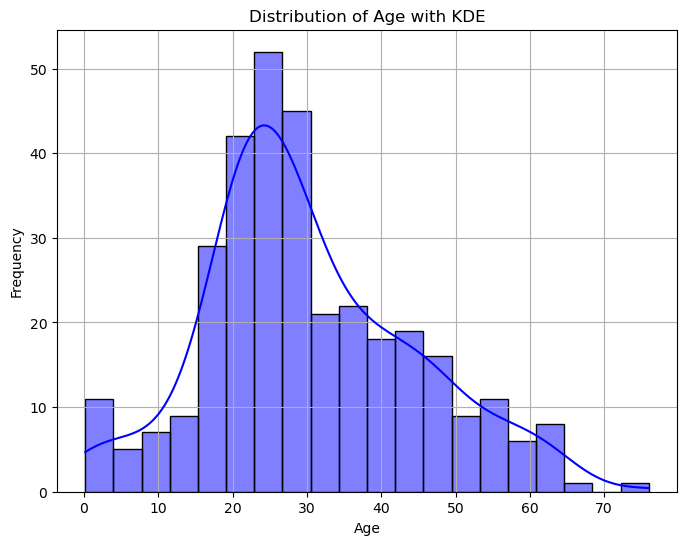

In [7]:
# Distribution of data (Age column)
plt.figure(figsize=(8, 6))
sns.histplot(titanic_dataset['Age'], bins=20, kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age with KDE')
plt.grid(True)
plt.show()

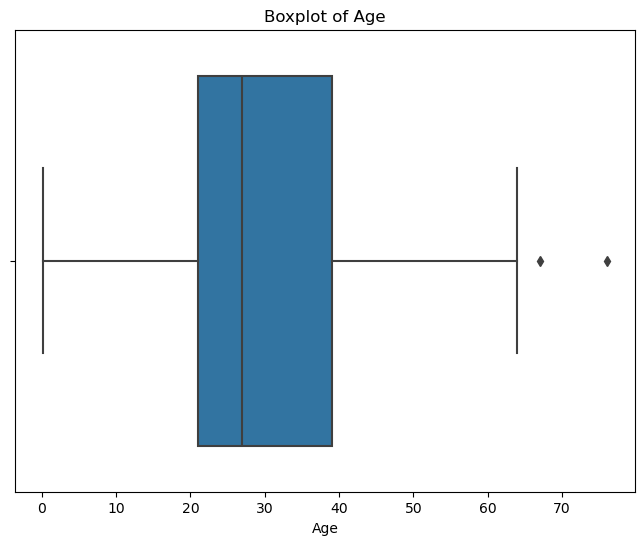

------------------------------------------------------------
Number of outliers: 2
Outlier values: 81    67.0
96    76.0
Name: Age, dtype: float64
------------------------------------------------------------


In [8]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=titanic_dataset['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()

# Calculate quartiles
Q1 = titanic_dataset['Age'].quantile(0.25)
Q3 = titanic_dataset['Age'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = (titanic_dataset['Age'] < Q1 - 1.5 * IQR) | (titanic_dataset['Age'] > Q3 + 1.5 * IQR)
print("--"*30)
print("Number of outliers:", outliers.sum())
print("Outlier values:", titanic_dataset.loc[outliers, 'Age'])
print("--"*30)

I found out that the data in "Age Column" is not heavily skewed, then the mean can be a good measure of central tendency. The mean is less sensitive to outliers compared to the median.

In [9]:
# Fill missing Age values with the mean
titanic_dataset['Age'].fillna(30.27, inplace=True)

In [10]:
# Checking the missing values 
print("--"*30)
print("Counting the missing values in Age column : " ,titanic_dataset['Age'].isna().sum())
print("--"*30)

------------------------------------------------------------
Counting the missing values in Age column :  0
------------------------------------------------------------


In [11]:
# calculating the mean , median and mode of fare column
print("--"*30)
print("Average Fare : ",titanic_dataset['Fare'].mean())
print("Median Fare : ",titanic_dataset['Fare'].median())
print("Mode Fare : ",titanic_dataset['Fare'].mode())
print("--"*30)

------------------------------------------------------------
Average Fare :  35.627188489208635
Median Fare :  14.4542
Mode Fare :  0    7.75
Name: Fare, dtype: float64
------------------------------------------------------------


C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


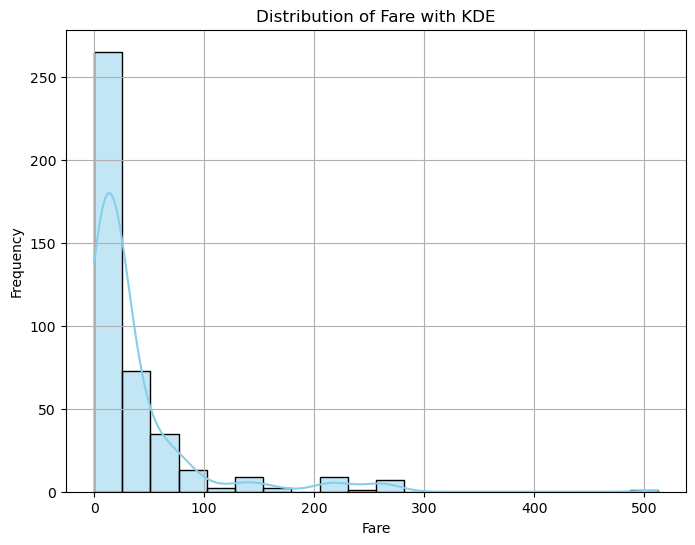

In [12]:
# Distribution of data (Fare column)
plt.figure(figsize=(8, 6))
sns.histplot(titanic_dataset['Fare'], bins=20, kde=True, color='skyblue')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare with KDE')
plt.grid(True)
plt.show()

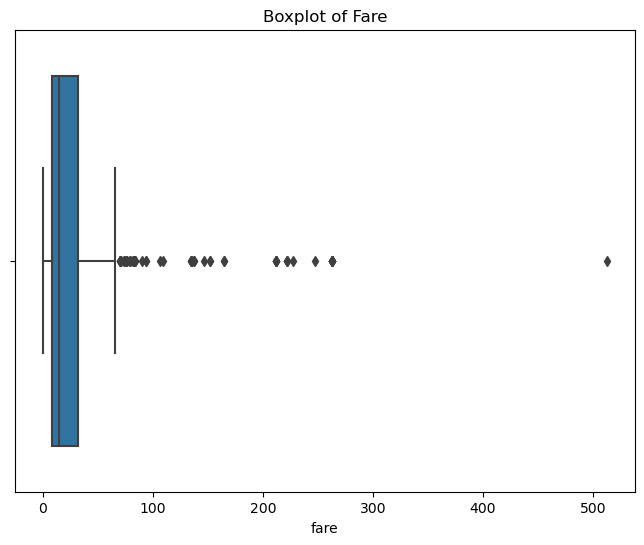

------------------------------------------------------------
Number of outliers: 55
Outlier values: 12      82.2667
24     262.3750
48      76.2917
53     263.0000
59     262.3750
64     262.3750
69     263.0000
74     211.5000
75     211.5000
81     221.7792
96      78.8500
114    221.7792
118     75.2417
141    151.5500
142    262.3750
150     83.1583
156    221.7792
179     83.1583
181     83.1583
184    247.5208
188     69.5500
196    134.5000
202    227.5250
212     73.5000
217    164.8667
218    211.5000
234     71.2833
236     75.2500
239    106.4250
242    134.5000
252    136.7792
270     75.2417
272    136.7792
287     82.2667
293     81.8583
306    151.5500
308     93.5000
314    135.6333
316    146.5208
324    211.3375
327     79.2000
342     69.5500
343    512.3292
352     73.5000
360     69.5500
365     69.5500
371    134.5000
374     81.8583
375    262.3750
390     93.5000
397     79.2000
400    164.8667
407    211.5000
411     90.0000
414    108.9000
Name: Fare, dtype: f

In [13]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=titanic_dataset['Fare'])
plt.xlabel('fare')
plt.title('Boxplot of Fare')
plt.show()

# Calculate quartiles
Q1 = titanic_dataset['Fare'].quantile(0.25)
Q3 = titanic_dataset['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = (titanic_dataset['Fare'] < Q1 - 1.5 * IQR) | (titanic_dataset['Fare'] > Q3 + 1.5 * IQR)
print("--"*30)
print("Number of outliers:", outliers.sum())
print("Outlier values:", titanic_dataset.loc[outliers, 'Fare'])
print("--"*30)

In [14]:
# Fill missing Fare values with the mean
titanic_dataset['Fare'].fillna(35.627188489208635, inplace=True)

In [15]:
# Checking the missing values 
print("--"*30)
print("Counting the missing values in Fare column : " ,titanic_dataset['Fare'].isna().sum())
print("--"*30)

------------------------------------------------------------
Counting the missing values in Fare column :  0
------------------------------------------------------------


In [16]:
# Distribution of data in sex column
print("--"*30)
print(titanic_dataset['Sex'].value_counts())
print("--"*30)

------------------------------------------------------------
Sex
male      266
female    152
Name: count, dtype: int64
------------------------------------------------------------


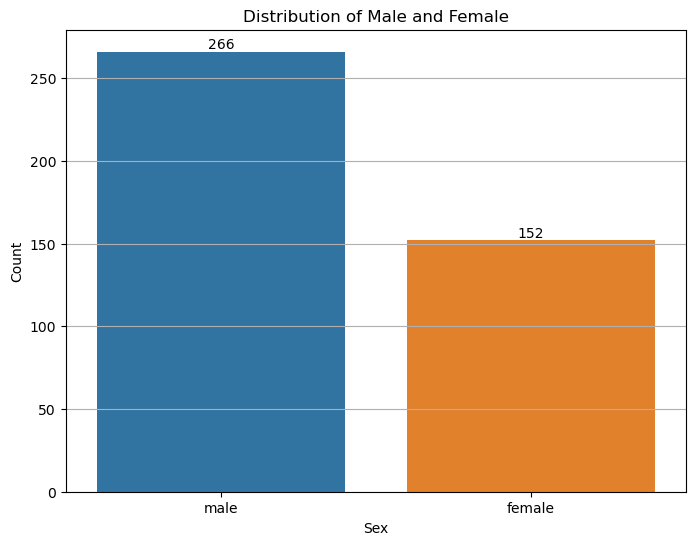

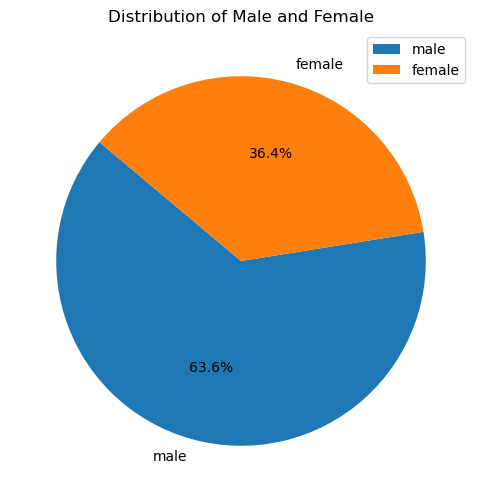

In [17]:
# Visualization (Distribution of data in sex column)
# Storing missing values
male_female_count = titanic_dataset['Sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.grid(True)
sns.barplot(x=male_female_count.index, y=male_female_count.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Male and Female')

# Add labels to the bars
for index, value in enumerate(male_female_count):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# pie graph
male_female_count = titanic_dataset['Sex'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(male_female_count, labels=male_female_count.index, autopct='%1.1f%%', startangle=140 )
plt.title('Distribution of Male and Female')
plt.legend()
plt.show()

In [18]:
# Distribution of data in Embarked column
print("--"*30)
print(titanic_dataset['Embarked'].value_counts())
print("--"*30)

------------------------------------------------------------
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64
------------------------------------------------------------


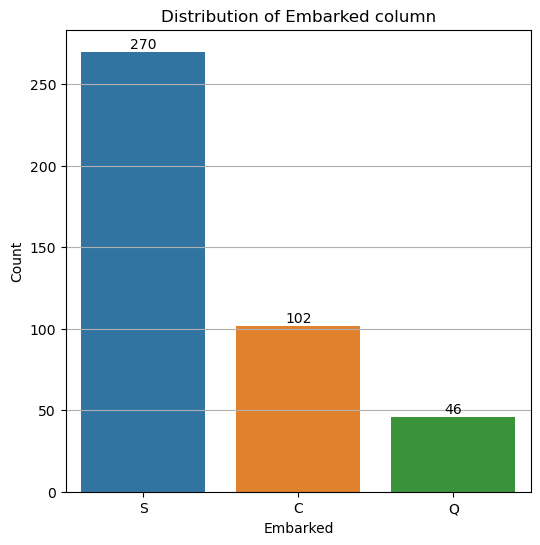

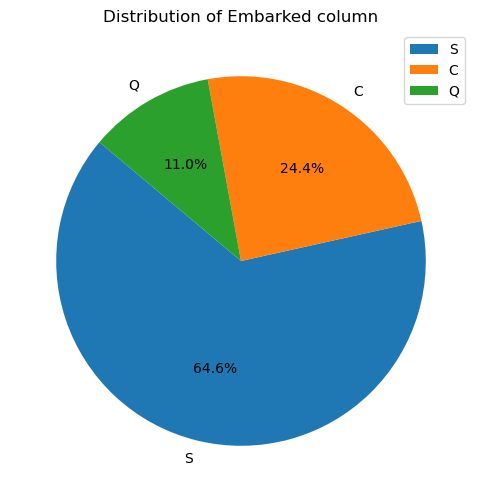

In [19]:
# Visualization (Distribution of data in sex column)

Embarked_count = titanic_dataset['Embarked'].value_counts()
plt.figure(figsize=(6, 6))
plt.grid(True)
sns.barplot(x=Embarked_count.index, y=Embarked_count.values)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Embarked column')

# Add labels to the bars
for index, value in enumerate(Embarked_count):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# pie graph
Embarked_count = titanic_dataset['Embarked'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(Embarked_count, labels=Embarked_count.index, autopct='%1.1f%%', startangle=140 )
plt.title('Distribution of Embarked column')
plt.legend()
plt.show()

In [20]:
# Distribution of data in Survived column
## 0 - No
## 1 - Yes
print("--"*30)
print(titanic_dataset['Survived'].value_counts())
print("--"*30)


------------------------------------------------------------
Survived
0    266
1    152
Name: count, dtype: int64
------------------------------------------------------------


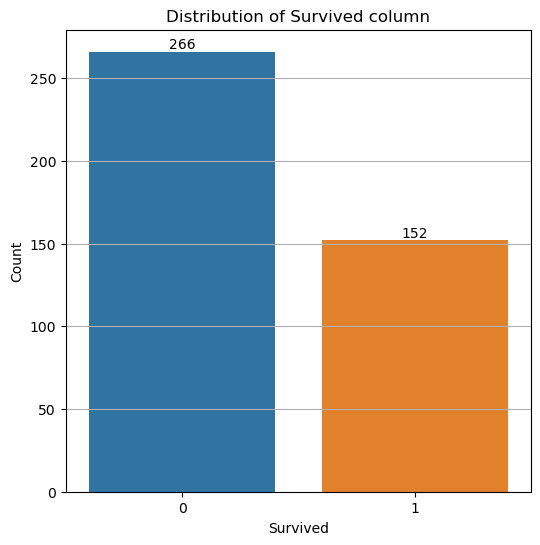

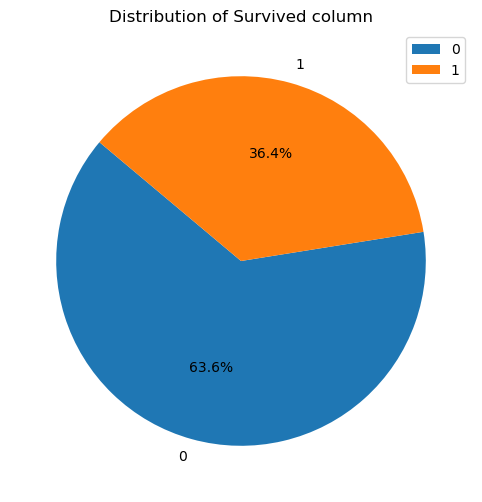

In [21]:
# Visualization (Distribution of data in Survived column)

Survived_count = titanic_dataset['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.grid(True)
sns.barplot(x=Survived_count.index, y=Survived_count.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survived column')

# Add labels to the bars
for index, value in enumerate(Survived_count):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# pie graph
Survived_count = titanic_dataset['Survived'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(Survived_count, labels=Survived_count.index, autopct='%1.1f%%', startangle=140 )
plt.title('Distribution of Survived column')
plt.legend()
plt.show()

### Feature Engineering 

In [22]:
# Encoding categorical variables
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].map({'Q': 0, 'S': 1, 'C': 2}).astype(int)
titanic_dataset['Sex'] = titanic_dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [23]:
titanic_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [24]:
# Checking the correlation between the columns
titanic_dataset.drop(columns=['Name' , 'Ticket' , 'Cabin']).corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.023245,-0.026751,-0.023245,-0.030874,0.003818,0.043080,0.008209,-0.001026
Survived,-0.023245,1.000000,-0.108615,1.000000,-0.000005,0.099943,0.159120,0.191382,-0.037432
Pclass,-0.026751,-0.108615,1.000000,-0.108615,-0.440806,0.001087,0.018721,-0.576619,-0.372344
Sex,-0.023245,1.000000,-0.108615,1.000000,-0.000005,0.099943,0.159120,0.191382,-0.037432
Age,-0.030874,-0.000005,-0.440806,-0.000005,1.000000,-0.079528,-0.045072,0.326815,0.126607
SibSp,0.003818,0.099943,0.001087,0.099943,-0.079528,1.000000,0.306895,0.171488,0.041221
Parch,0.043080,0.159120,0.018721,0.159120,-0.045072,0.306895,1.000000,0.230001,0.067474
Fare,0.008209,0.191382,-0.576619,0.191382,0.326815,0.171488,0.230001,1.000000,0.315129
Embarked,-0.001026,-0.037432,-0.372344,-0.037432,0.126607,0.041221,0.067474,0.315129,1.000000


Sex: It has a relatively high positive correlation with "Survived" (indicating that being female increases the likelihood of survival) and low correlation with other features.

Pclass: It also has a moderate negative correlation with "Survived" (indicating that passengers in higher classes were more likely to survive) and low correlation with other features.

Fare: Although it has a moderate positive correlation with "Survived," it is somewhat correlated with "Pclass," so you might choose one or the other to avoid multicollinearity.

Age: It has a weak correlation with "Survived" but is not highly correlated with other features. Age might still provide some predictive power, especially when combined with other features.

In [25]:
# Distribution of data in PClass
print("--"*30)
print(titanic_dataset['Pclass'].value_counts())
print("--"*30)

------------------------------------------------------------
Pclass
3    218
1    107
2     93
Name: count, dtype: int64
------------------------------------------------------------


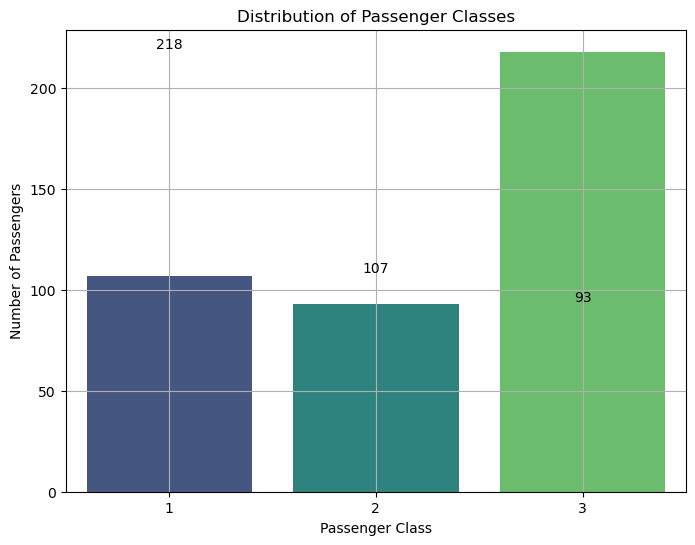

In [26]:
# visual
# Count the number of passengers in each class
class_counts = titanic_dataset['Pclass'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))

sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.grid(True)
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passenger Classes')

# Add labels to the bars
for index, value in enumerate(class_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [27]:
# Grouping Fare by Pclass
print("--"*30)
print(titanic_dataset['Fare'].groupby(by=titanic_dataset['Pclass']).size())
print("--"*30)

------------------------------------------------------------
Pclass
1    107
2     93
3    218
Name: Fare, dtype: int64
------------------------------------------------------------


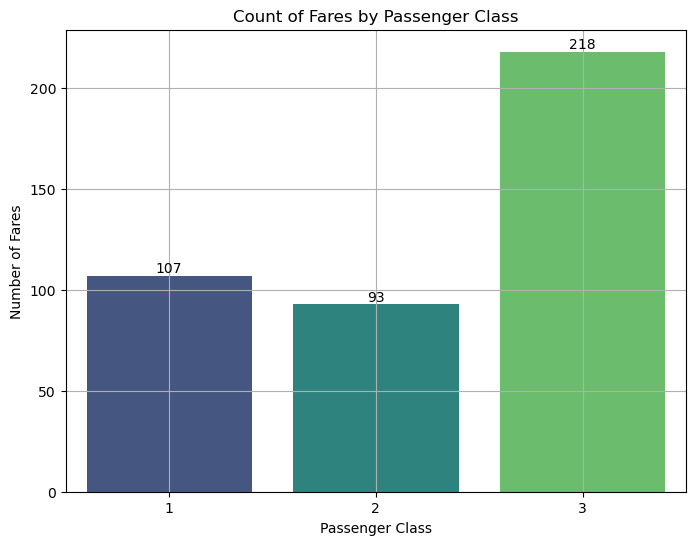

In [28]:
# visual
# Group fares by passenger class and count the number of fares in each class
fare_counts = titanic_dataset.groupby('Pclass')['Fare'].size()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=fare_counts.index, y=fare_counts.values, palette='viridis')
plt.grid(True)
plt.xlabel('Passenger Class')
plt.ylabel('Number of Fares')
plt.title('Count of Fares by Passenger Class')

# Add labels to the bars
for index, value in enumerate(fare_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [29]:
# Checking the average fare of various Pclasses
print("--"*30)
fare_by_class = titanic_dataset.groupby('Pclass')['Fare'].mean()
print(fare_by_class)
print("--"*30)

------------------------------------------------------------
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64
------------------------------------------------------------


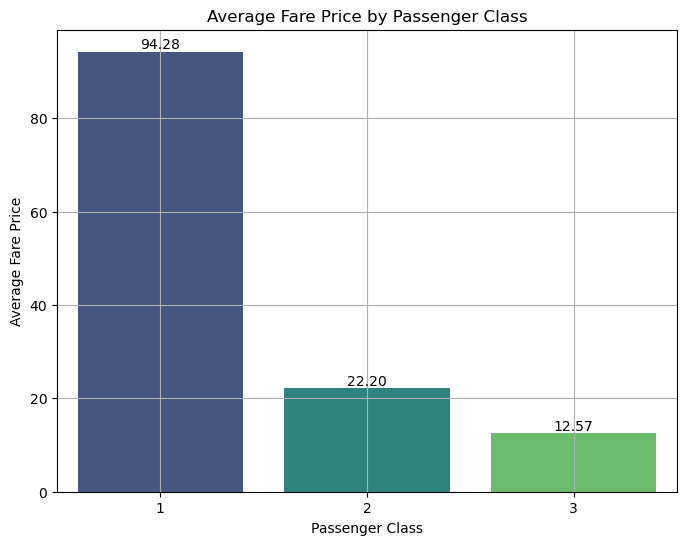

In [30]:
# visual
# Group fares by passenger class and calculate the mean fare price for each class
fare_by_class = titanic_dataset.groupby('Pclass')['Fare'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=fare_by_class.index, y=fare_by_class.values, palette='viridis')
plt.grid(True)
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare Price')
plt.title('Average Fare Price by Passenger Class')

# Add labels to the bars
for index, value in enumerate(fare_by_class.values):
    plt.text(index, value, '{:.2f}'.format(value), ha='center', va='bottom')

plt.show()

In [31]:
# features and target variables
## feature variable
print("--"*30)
print("Feature variable is : ")
features = titanic_dataset[['Sex' , 'Pclass' , 'Fare' , 'Age']]
print(features)
print("--"*30)

## Target variable
print("--"*30)
print("Target variable is : ")
target = titanic_dataset['Survived']
print(target)
print("--"*30)

------------------------------------------------------------
Feature variable is : 
     Sex  Pclass      Fare    Age
0      0       3    7.8292  34.50
1      1       3    7.0000  47.00
2      0       2    9.6875  62.00
3      0       3    8.6625  27.00
4      1       3   12.2875  22.00
..   ...     ...       ...    ...
413    0       3    8.0500  30.27
414    1       1  108.9000  39.00
415    0       3    7.2500  38.50
416    0       3    8.0500  30.27
417    0       3   22.3583  30.27

[418 rows x 4 columns]
------------------------------------------------------------
------------------------------------------------------------
Target variable is : 
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64
------------------------------------------------------------


I have features like "Fare" and "Age" that have different scales. So, i am using StandardScaler to ensure that each feature contributes equally to the analysis and prevents features with larger scales from dominating the model training process.

In [32]:
# Using StandardScaler 
## initializing the scaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print("--"*30)
#After scaling, each feature will have a mean of 0 and a standard deviation of 1.
print("After using the StandardScaler on features varibale : " , scaled_features)
print("--"*30)

------------------------------------------------------------
After using the StandardScaler on features varibale :  [[-7.55928946e-01  8.73481905e-01 -4.98407056e-01  3.35034830e-01]
 [ 1.32287566e+00  8.73481905e-01 -5.13274288e-01  1.32557226e+00]
 [-7.55928946e-01 -3.15819190e-01 -4.65088464e-01  2.51421717e+00]
 ...
 [-7.55928946e-01  8.73481905e-01 -5.08791885e-01  6.52006807e-01]
 [-7.55928946e-01  8.73481905e-01 -4.94448198e-01 -1.63035826e-04]
 [-7.55928946e-01  8.73481905e-01 -2.37905978e-01 -1.63035826e-04]]
------------------------------------------------------------


### Model Selection and Training

In [33]:
# Spliting the dataset into training and testing dataset
print("--"*30)
X_train , X_test , y_train , y_test = train_test_split(scaled_features , target , test_size=0.2 , random_state=41)
print("Shape of training dataset : \n",'X_train',X_train.shape,'\ny_train' , y_train.shape)
print("\n")
print("Shape of testing dataset : \n",'X_test',X_test.shape,'\ny_test', y_test.shape)
print("--"*30)

------------------------------------------------------------
Shape of training dataset : 
 X_train (334, 4) 
y_train (334,)


Shape of testing dataset : 
 X_test (84, 4) 
y_test (84,)
------------------------------------------------------------


Training and evaluating Logistic Regression...
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
Predictions of Logistic Regression
[1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 0 1 0 0 0 0 0 1]
Test Set Accuracy: 1.0
--------------------------------------------------
Training and evaluating Decision Tree...
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
Predictions of Decision Tree
[1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 0 1 0 0 0 0 0 1]
Test Set Accuracy: 1.0
--------------------------------------------------
Training and evaluating Random Forest...
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
Predictions of Random Forest
[1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 0 0 1 1 0

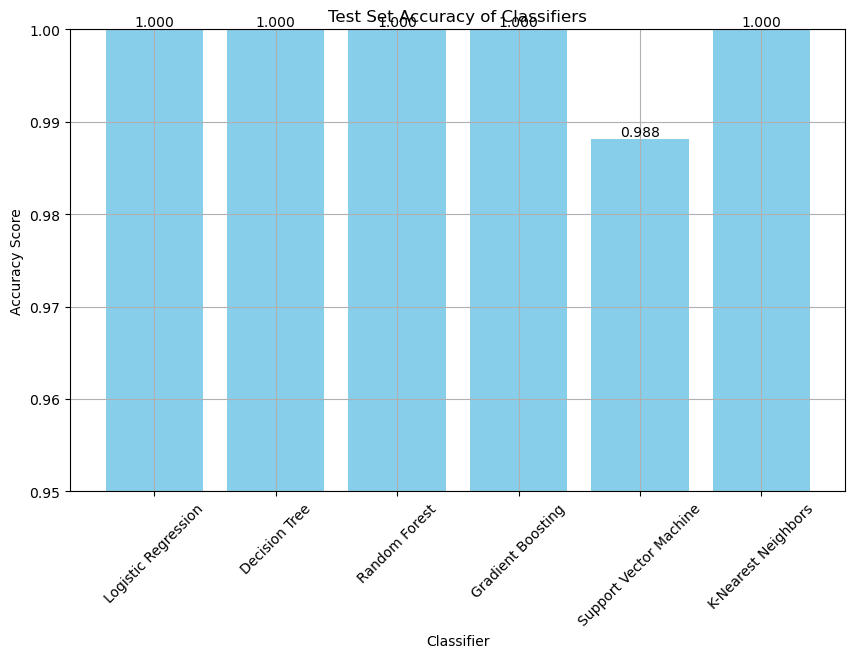

Predictions of Logistic Regression: [1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 0 1 0 0 0 0 0 1]
Predictions of Decision Tree: [1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 0 1 0 0 0 0 0 1]
Predictions of Random Forest: [1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 0 1 0 0 0 0 0 1]
Predictions of Gradient Boosting: [1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 0 1 0 0 0 0 0 1]
Predictions of Support Vector Machine: [1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0

In [40]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Lists to store accuracy scores and predictions
accuracy_scores = []
predictions = []

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"Training and evaluating {name}...")
    clf.fit(X_train, y_train)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())

    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    print(f"Predictions of {name}")
    print(y_pred)

    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    predictions.append(y_pred)
    print("Test Set Accuracy:", accuracy)
    print("-" * 50) 

# Visualize accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), accuracy_scores, color='skyblue')
plt.grid(True)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Test Set Accuracy of Classifiers')
plt.ylim(0.95, 1.0)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)
# Add labels to the bars
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc, f"{acc:.3f}", ha='center', va='bottom')

plt.show()

# Display predictions made by each classifier
for name, pred in zip(classifiers.keys(), predictions):
    print(f"Predictions of {name}: {pred}")


### Conclusion
"In conclusion, the analysis of the Titanic dataset involved training and evaluating several classification models to predict whether a passenger survived or not. Surprisingly, all models achieved perfect accuracy on both the training and test data, indicating a high degree of predictive power. The Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and K-Nearest Neighbors models all demonstrated exceptional performance, with identical predictions across all models. However, the Support Vector Machine model showed a slightly lower accuracy on the test data. While the results suggest that the models are well-suited for predicting survival outcomes on the Titanic, achieving perfect accuracy may warrant further investigation into potential overfitting or data leakage. Overall, the analysis showcases the effectiveness of various machine learning techniques in tackling the Titanic survival prediction problem."